# The automatic differentiation project

Author: Clemens Ibrom

## Overview
This project aims to provide a custom expression class which can be used to perform symbolic manipulation and differentiation of mathematical expressions. \
The following guide showcases the libraries and provides examples of their functionality. \
The project is part of the Advanced Scientific Computing Practical (M.Mat.0731) exam at Universität Göttingen under the supervision od Dr. Igor Voulis.

## Structure
The library is divided into multiple files, each containing a different functionality. The heartpiece is `expression.py`, where the custom class 'myexpr' can be found. The other files are named after theirs contents. Note, that most rely on each other so import all of them may be required. The files `derivatives.py` and `evaluation.py` contain functions that calculate the symbolic derivative of an instance of 'myexpr' and the value of an instance of 'myexpr' respectively. The file `vectors.py` contains two more classes - vect and matrix - which build upon 'myexpr' and generilze it to higher dimensional expressions. In `graphics.py` there are a few functions which enable plotting of 'myexpr' via usage the of myplotlib.pyplot routines. Finally, `parsing.py` contains methods that parse user input in the form of a string to a symbolic expression in the format of 'myexpr'. \
Additionally to the following guide each class and function has a docstring which can be accessed via .__doc__ and contains information on how to use the method or how it works.

## Creating symbolic expressions
To create a simple symbolic expression we only need `expression.py`. An instance of 'myexpr' contains the following information:
- a tag/label in the attribute `op`
- a left part in the attribute `left`
- a right part in the attribute `right`
- a string representation in the attribute `str`
- an anonymous function that is used to evaluate it in the attribute `worth`

The tag must be one of the following: id, const, add, mul, pwr or a special function that is defined (these may be expanded upon in the future, the current tags available can be found in `expression.py`). The tag 'id' is to be used for variables, while 'const' is reserved for numerical constants. For example just the variable 'x' would be 
```
myexpr(op = 'id', left = 'x', right = None)
```
For simplicity's sake the arguments left and right are optional with default value None, so the above can be shortened to 
```
myexpr('id','x')
```
Additionally, 'x' is taken to be the default variable name, so `myexpr('id')` would lead to the same outcome. Below are examples and rules of creating symbolic expressions.

In [1]:
from expression import *
print(f'The available tags are {tags}')

The available tags are ['id', 'const', 'add', 'mul', 'pwr', 'exp', 'sin', 'cos', 'tan', 'log']


If there is only one argument, as in the case of the identity or a trigonometric function, then the argument 'right' is left out. So $sin(x)$ would be `myexpr('sin',myexpr('id'))`. To create a constant the same applies, but 'left' should be a string containing the constant, e.g. `myexpr('const','3.14')`. Division and substraction are reduced to addition, multiplication and taking powers. Below is an example of a more complicated expression involving substraction, division and special functions. Note that this could also be done in one line, but that may impact code readability.

In [2]:
#An example of an expression: (x - 1)*sin(x/2)
difference = myexpr('add',myexpr('id'),myexpr('mul',myexpr('const','-1'),myexpr('const','1')))
sinus_arg = myexpr('mul',myexpr('id'),myexpr('pwr',myexpr('const','2'),myexpr('const','-1')))
sinus = myexpr('sin',sinus_arg)
expression = myexpr('mul',difference,sinus)

print(expression)

(x + (-1)*(1))*(sin((x)*((2)^(-1))))


To create multivariate expressions simply assign the different instances of the identitiy different names as the 'left' argument.

In [3]:
#An example of an expression in two variables
var1 = myexpr('id','x')
var2 = myexpr('id','y')

multivar_expression = myexpr('add',var1,var2)

print(multivar_expression)

x + y


## Evaluation and derivatives

Instances of `myexpr` can be evaluated at given values and the derivative with respect to given variables can be calculated. The code for both can be found in `evaluation.py` and `derivatives.py` repsectively. Both work recursively through an expression until the base case of either a constant or a variable are reached.

### Evaluation 

To evaluate a symbolic expression one has to provide the name of the variable(s) to be evaluated along with the value(s). This has to be in the form of a dictionary with the variable(s) as the key(s) and the corresponding value(s) as floats. If the expression has multiple variables, but not all are to evaluated the result will be string with the given variables evaluated and the ommited ones untouched.

In [4]:
from evaluation import *

#Evaluating a single variable expression
eval_expression = myexpr('add', myexpr('id'),myexpr('sin',myexpr('id')))
val = calc_eval(eval_expression, {'x': 1.571})

print(f'The expression {eval_expression} at x=1.571 is {val}.')

#Evaluating a multivariate expression at one and both variables
multi_expr = myexpr('mul',myexpr('add',myexpr('id','x'),myexpr('const','1')),myexpr('add',myexpr('id','y'),myexpr('const','2')))
val_x = calc_eval(multi_expr, {'x': 1})
val_both = calc_eval(multi_expr, {'x': 1, 'y': 1})

print(f'The expression {multi_expr} at x=1 is {val_x} and at (x=1,y=1) is {val_both}.')

The expression x + sin(x) at x=1.571 is 2.570999979258613.
The expression (x + 1)*(y + 2) at x=1 is (2.0) * (y + 2.0) and at (x=1,y=1) is 6.0.


### Derivatives

These work similarly to evaluation. To differentiate an expression one has to provide a list of variables with respect to which the expression is to be differentiated. The function `calc_diff` from `derivatives.py` then calls routines for the specific tags, e.g. `diff_id` or `diff_sin`. These 'tag-specific' functions have the chain rule built in. As of now, there is no simplification of symbolic expressions, so the chain rule makes the result look a bit messy. The output of `calc_diff` is always an instance of `myexpr`.

In [5]:
from derivatives import *

#The derivative of a single variable expression from the previous example
der = calc_diff(eval_expression, 'x')

print(f'The derivative of {eval_expression} w.r.t. x is {der}.')

#The derivative of a multivariate expression from the previous example
multi_der = calc_diff(multi_expr,'x')

print(f'The derivative of {multi_expr} w.r.t. x is {multi_der}.')

The derivative of x + sin(x) w.r.t. x is 1 + (cos(x))*(1).
The derivative of (x + 1)*(y + 2) w.r.t. x is (1 + 0)*(y + 2) + (x + 1)*(0 + 0).


### Plotting 

Making use of the evaluation functionality symbolic expressions can be graphed with `graphics.py`. These are not self-written graphing routines, but functions that use `myexpr` functionalities to generate data for the input of matplotlib.pyplot graphing functions. Since the functions use the evaluation routines, it is necessary to provide the variable and it is not possible to plot only one variable in a multivariate expression.

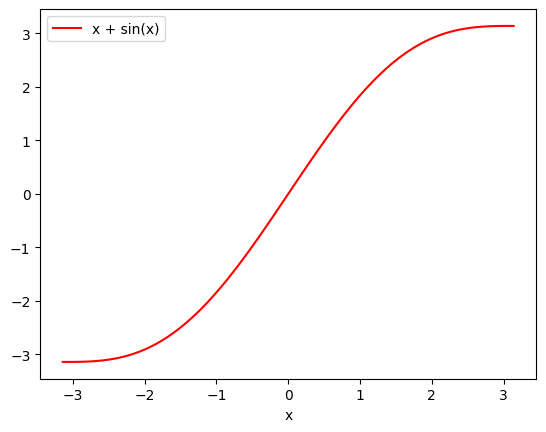

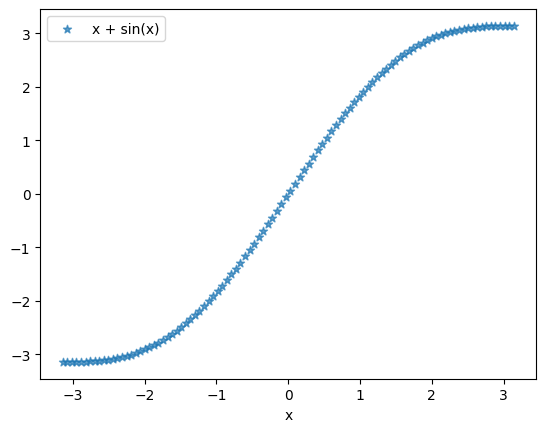

0

In [6]:
from graphics import *

#Graphing examples
myplot(eval_expression, domain = np.linspace(-np.pi,np.pi,100), var = 'x', format = 'r-')
myscatter(eval_expression, domain = np.linspace(-np.pi,np.pi,100), var = 'x', marker = '*', alpha = 0.7)

### Plotting surfaces

It is also possible to graph surfaces with `my3Dsurface`. It uses the `matplotlib.pyplot.plot_trisurf()`. One needs to provide an $\mathbb{R}^2 \to \mathbb{R}$ function in the form of `myexpr` and a dictionary in the format {variable: domain}, where the domain should be a list of floats. Requires the domain to be square.

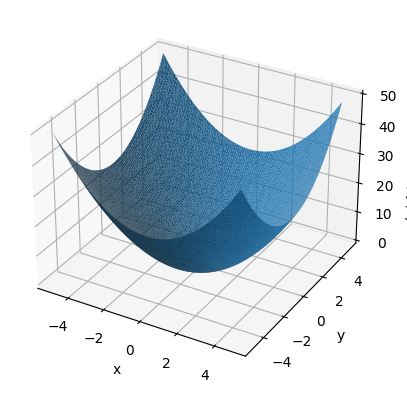

0

In [7]:
#The domains
x_vals = np.arange(-5,5,0.1)
y_vals = np.arange(-5,5,0.1)

#The function to be plotted: x^2 + y^2
term = myexpr('add',myexpr('pwr',myexpr('id','x'),myexpr('const','2')),myexpr('pwr',myexpr('id','y'),myexpr('const','2')))

#Plot
my3Dsurface(term,{'x': x_vals, 'y': y_vals})

## Vectors and matrices

It is also possible to create and work with vectors and matrices whose entries are instances of `myexpr`. The classes for these can be found in `vectors.py`. A vector has the data of it's dimension and a list of it's components, a matrix has the data of it's number of columns - which are vectors - and the dimension of the vectors as well as a list of it's column vectors. After initialising a vector one can add it's components via the method `add_comp()`. \
Note that, although the vectors are treated as column vectors, the printed representation is a row vector.

In [8]:
from vectors import *

#Initializing a vector
v = vect(3)

#Adding components
v.add_comp(myexpr('id','x'))
v.add_comp(myexpr('add',myexpr('const','1.68'),myexpr('sin',myexpr('id','y'))))
v.add_comp(myexpr('const','0'))

print(v)

#Creating a matrix
m = matrix(3,3,[v,v,v])

print(m)

[x, 1.68 + sin(y), 0]
[[  x,       x,       x,     
  1.68 + sin(y),       1.68 + sin(y),       1.68 + sin(y),     
  0,       0,       0,     
]]


### Vector operations

Vectors can be added, the dot and cross product can be formed, they can be mulitplied by a scalar. Furthermore, since the components of a vector are instances of `myexpr` they can be evaluated and differentiated using the functions in `vectors.py`. One can differentiate a vector w.r.t. a variable (component-wise) via `vect_diff()` or the gradient can be computed via `vect_grad()`. The resulting vectors have as entries instances of `myexpr`. \
The vector evaluation method `vect_eval()` uses string-to-myexpr parsing (more on that later on). This is because the method `calc_eval()` from `evaluation.py` returns a string if the expression contains variables that are not evaluated.

In [9]:
#Creating the vectors
v1 = vect(3)
v2 = vect(3)

v1.add_comp(myexpr('id','x'))
v1.add_comp(myexpr('const','1.414'))
v1.add_comp(myexpr('const','0'))

v2.add_comp(myexpr('const','1'))
v2.add_comp(myexpr('id','y'))
v2.add_comp(myexpr('const','0.577'))

#Addition, dot and cross product, scalar multiplication
v_sum = vect_add(v1,v2)

print(f'The sum of the vectors is {v_sum}.')

v_dot_p = vect_dot_prod(v1,v2)

print(f'The dot product of the vectors is {v_dot_p}.')

v_cross_p = vect_cross_prod(v1,v2)

print(f'The cross product of the vectors is {v_cross_p}.')

v_scalar = vect_scalar_mul(v1,myexpr('const','2'))

print(f'The vector {v1} multiplied by 2 is {v_scalar}.')

#Evaluation
v_evald = vect_eval(v1, {'x': 2})
print(f'The vector {v1} evaluated at x=1 is {v_evald}.')

#Derivatives
v_diff = vect_diff(v1,'x')

print(f'The vector {v1} differentiated w.r.t. x is {v_diff}.')

#Gradient of scalar function
grad = vect_grad(multi_expr,['x','y'])

print(f'The gradient of f(x,y) = {multi_expr} is {grad}.')

The sum of the vectors is [x + 1, 1.414 + y, 0 + 0.577].
The dot product of the vectors is (x)*(1) + (1.414)*(y) + (0)*(0.577).
The cross product of the vectors is [(1.414)*(0.577) + (-1)*((0)*(y)), (0)*(1) + (-1)*((x)*(0.577)), (x)*(y) + (-1)*((1.414)*(1))].
The vector [x, 1.414, 0] multiplied by 2 is [(x)*(2), (1.414)*(2), (0)*(2)].
The vector [x, 1.414, 0] evaluated at x=1 is [2.0, 1.414, 0.0].
The vector [x, 1.414, 0] differentiated w.r.t. x is [1, 0, 0].
The gradient of f(x,y) = (x + 1)*(y + 2) is [(1 + 0)*(y + 2) + (x + 1)*(0 + 0), (0 + 0)*(y + 2) + (x + 1)*(1 + 0)].


### Matrix operations

Analogously to the vector case matrices can be added, multiplied, evaluated and differentiated via the functions `mat_add()`, `mat_prod()`, `mat_eval()` and `mat_diff()` respectively. All of these use vector methods. A matrix can also be multiplied from the right with a vector. The resulting matrices have as entries instances of `myexpr`.

In [10]:
#Set-up for matrices
#create column vectors
a = vect(2)
a.add_comp(myexpr('id','x'))
a.add_comp(myexpr('const', '1'))
b = vect(2)
b.add_comp(myexpr('const','0'))
b.add_comp(myexpr('id','x'))
c = vect(2)
c.add_comp(myexpr('const','1'))
c.add_comp(myexpr('const','2'))
d = vect(2)
d.add_comp(myexpr('const','3'))
d.add_comp(myexpr('const','4'))

m1 = matrix(2,2,[a,b])
m2 = matrix(2,2,[c,d])

print(f'm1 is \n {m1}')
print(f'm2 is \n {m2}')

m1 is 
 [[  x,       0,     
  1,       x,     
]]
m2 is 
 [[  1,       3,     
  2,       4,     
]]


In [11]:
#Addition and multiplication
m_sum = mat_add(m1,m2)
m_prod = mat_prod(m1,m2)

print(f'm1+m1 is \n {m_sum}')
print(f'm1*m2 is \n {m_prod}')

m1+m1 is 
 [[  x + 1,       0 + 3,     
  1 + 2,       x + 4,     
]]
m1*m2 is 
 [[  (x)*(1) + (0)*(2),       (x)*(3) + (0)*(4),     
  (1)*(1) + (x)*(2),       (1)*(3) + (x)*(4),     
]]


In [12]:
#Evaluation and differentiation
m_eval = mat_eval(m1,{'x':1})
m_diff = mat_diff(m1,'x')

print(f'm1 evaluated at x=1 is \n {m_eval}')
print(f'm1 differentiated w.r.t. x is \n {m_diff}')

m1 evaluated at x=1 is 
 [[  1.0,       0.0,     
  1.0,       1.0,     
]]
m1 differentiated w.r.t. x is 
 [[  1,       0,     
  0,       1,     
]]


In [13]:
#Matrix multiplied with a vector
m_v = mat_vect_prod(m1,a)

print(f'm1*a is {m_v}')

m1*a is [(x)*(x) + (0)*(1), (1)*(x) + (x)*(1)]


### Plotting vector fields

Vectorfields in 2 and 3 dimensions can be plotted as well, using `myvectfield2D()` and `myvectfield3D()`. These are both wrappers for `pyplot.quiver()`.

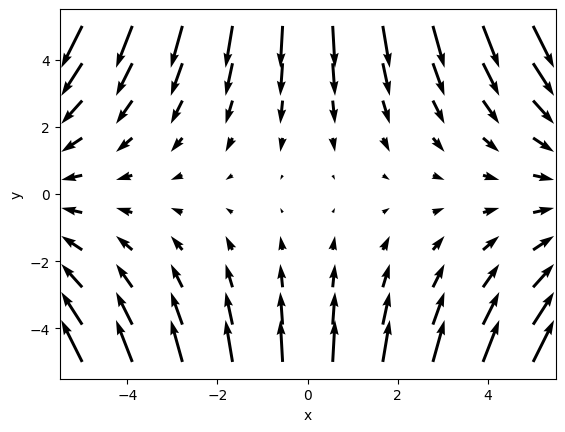

0

In [14]:
#2D vector field plot example
#F = x*i - 2*j
vector_field = vect(2)
vector_field.add_comp(myexpr('id','x'))
vector_field.add_comp(myexpr('mul',myexpr('const','-2'),myexpr('id','y')))

myvectfield2D(vector_field,{'x':np.linspace(-5,5,10), 'y': np.linspace(-5,5,10)})

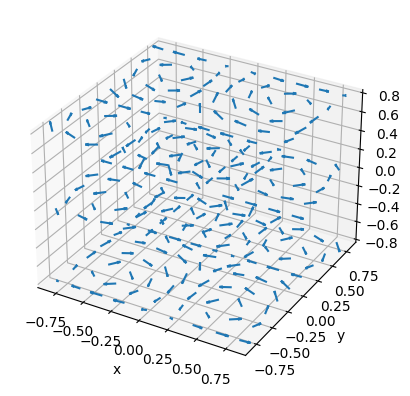

0

In [15]:
#3D vector field plot example
#after the example code from https://matplotlib.org/stable/gallery/mplot3d/quiver3d.html#sphx-glr-gallery-mplot3d-quiver3d-py
#last accessed 23.09.24

#the vector field
v1 = vect(3)
v1.add_comp(my_parser(['x','y','z'], '(sin(3.14159*x))*((cos(3.14159*y))*(cos(3.14159*z)))'))
v1.add_comp(my_parser(['x','y','z'], '(-1)*((cos(3.14159*x))*((sin(3.14159*y))*(cos(3.14159*z)))))'))
v1.add_comp(my_parser(['x','y','z'], '((0.66)**(0.5))*((cos(3.14159*x))*((cos(3.14159*y))*(sin(3.14159*z)))))'))

#the plot
myvectfield3D(v1,{'x': np.arange(-0.8, 1, 0.2), 'y': np.arange(-0.8, 1, 0.2), 'z': np.arange(-0.8, 1, 0.8)})

## Parsing

Since it can become cumbersome to create large nested expressions using the `myexpr` syntax there is the alternative option of user input. Provided the input is a string in standard mathematical notation with proper bracketing (this is explained in detail below), it can be translated to an instance of `myexpr`. The rules are:
- bracketing must be explicit, i.e. (2+3)+4 not 2+3+4 or 2*(3*4)
- fractions are allowed, but must be bracketed, e.g. (2/3)*x
- the variable names must be provided
- if three thigns are being mulitplied, always bracket the two right-most ones
- exponentiating syntax is (base)**(power)
- special functions (i.e. trig functions, log etc.) have to be put in brackets

Some examples:

In [16]:
#x^2 + y^2
ex1 = my_parser(['x','y'],'x**2 + y**2')
print(f'x^2+y^2 parsed is {ex1}')

#special function
ex2 = my_parser(['x'], '2*(sin(x))')
print(f'2*sin(x) parsed is {ex2}')

#constant
ex3 = my_parser([],'2')
print(f'2 parsed is {ex3}')

#something more complicated
ex4 = my_parser(['x','y'],'(3*x - 1)*(sin(y/2))')
print(f'(3x-1)(sin(y/2)) parsed is {ex4}')

x^2+y^2 parsed is (x)^(2) + (1)*((y)^(2))
2*sin(x) parsed is (2)*(sin(x))
2 parsed is 2
(3x-1)(sin(y/2)) parsed is ((3)*(x) + (-1)*(1))*(sin((y)*((2)^(-1))))


The parser works by tokenizing the input string with `tokenize()`. This is why bracketing is required, as that determines the order of parsing. Variables get their own tokens. For example the string '1 + x' would be tokenized as {'A': 'x', 'B': '1 + (A)'}. The conversion to `myexpr` happens after every tokenization, so in the example, the variable 'x' would be converted before it got added to the dictionary and in fact the dictionary would be {'A': x, 'B': 1 + x}. If an expression contains multiple occurences of the same variable at different 'levels' (e.g. 'x + (1+x)' has an addition 'x' in the bracket, so that will be handled first), there will be two tokens created for 'x'. This is a bit wasteful, but makes variable handling easier. \
The function that converts string to `myexpr` is `conv_mon()`. It recieves a string, possibly with tokens, and a dictionary of the form {TOKEN: myexpr} from tokenize. Because of the way `tokenize()` breaks up the input, the string received by `conv_mon()` can only be of a few well-defined forms (see `conv_mon().__doc__`).